In [105]:
import os
import re
def DIR2lasti(DIR,pattern='seed(\d+)_size600'):
    dlst = os.listdir(DIR)
    dlst = ''.join(dlst)
    it = re.findall(pattern,dlst)
    lasti = max(map(int,it))
    return lasti
# DIR = 'data_pdist/'
DIR= 'data_pdist_rev'
DIR2lasti(DIR)

import numpy as np
fs = os.listdir(DIR)[:100]
out = sum((np.load(os.path.join(DIR,f)).tolist()  for f in fs),[])

print 'No. of rules:',len(out)


No. of rules: 60000


In [57]:
19800/600

33

In [101]:
# %matplotlib notebook
from pymisca.util import *
from pymisca.vis_util import *
import IPython.display as ipd

import KBs
import random
import workers

DIR = 'data_pdist'
tst_dct = [{'family':'2dntca','rulestr':x[1]} for x in KBs.tst_data]
# tst_out = mp_map(workers.worker0323,tst_dct,n_cpu=6)
tst_out = np.load('data_pdist/reference.npy').tolist()
print 'finished'

finished


In [66]:
# ?sorted
osort[104430]

{'data': {'cor': [0.0022258880021863783],
  'cov': [0.00010766015737289332,
   2.558829853074014e-07,
   2.558829853074014e-07,
   0.00012274991222225524],
  'med': [0.9114583333333333, 0.9114583333333335]},
 'rule': {'family': 'r2dntca', 'rulestr': '3bd993f65198d36f4af6e52a65'}}

In [76]:
osort=sorted(out,key=lambda x:x['data']['med'][1],reverse=0)
osort[0]

{'data': {'cor': [0.26879533997778554],
  'cov': [0.00017719181072795628,
   4.4498891467997274e-05,
   4.4498891467997274e-05,
   0.00015467184561270247],
  'med': [0.8871527777777777, 0.9010416666666666]},
 'rule': {'family': 'r2dntca', 'rulestr': '26ad07fec14cda5c04517f5000'}}

In [ ]:
%matplotlib notebook
import pandas as pd
plt.figure(figsize=(5,4))
df0 = pd.DataFrame()
dt  = map(lambda x:x.get('data').get('med'),tst_out)
df = pd.DataFrame(dt)
df[2]='red'
df[3]=range(len(df))

df0 =  df0.append(df)

dt  = map(lambda x:x.get('data').get('med'),out)
df = pd.DataFrame(dt)
df[2]='blue'
df[3]=range(len(df))

# df = df.loc[(df[0]<0.92)&(df[0]>0.2),:]
df = df.loc[(df[0]<0.92)&(df[0]>0.2),:]

# idx = range(200,300)

print (len(df))
k=0
span = 600
idx = range(k*span,(k+1)*span)
try:
    df = df.iloc[idx,:]
except:
    pass

df0 =  df0.append(df)
# df0 = df0.loc[(df0[0]<0.8)&(df0[0]>0.2),:]
# assert 0==1
# idx = range(3000,6000)
# idx = range(200,400)
# idx = range(200)
# idx = list(idx)

def plotter(df):
    d={'red':['1st-order',tst_out],'blue':['2nd-order',out]}

    cmap = plt.get_cmap()
    pdata = zip(*df.loc[:,0:].as_matrix())
    # plt.scatter(*pdata,color='red')
    c0 = 'blk'
    for x,y,c,i in df.as_matrix():
        x = x+(np.random.random()-0.5)/50.
        y = y+(np.random.random()-0.5)/50.
        plt.scatter(x,y,color=c)
        plt.text(x,y,i )
        if c!=c0:
            plt.scatter(x,y,color=c,label=d[c][0]+',N=%d'%len(d[c][1]))
        c0=c
    plt.plot([0,1],[0,1],'--',color='red')
    plt.grid()
plotter(df0)
plt.xlabel('Median pairwise hamming distance at t=128')
plt.ylabel('Median pairwise hamming distance at t=256')
# plt.title('Sample size=%d')
plt.legend()
plt.show()

In [68]:
# KBs.guess(sysX=o)
print o.family.rulestr2table(o.rulestr,reverse=1)

@RULE rev_b03aiknqr2cekn5aeijkny4aejktz7c6cis03ceiqy2aein5ekry4ceijtwyz6i
@TABLE
n_States:4
neighborhood:Moore
symmetries:rotate4reflect

var a0={0,2} ### curr0
var b0={1,3} ### curr1
var a1={0,2} ### curr0
var b1={1,3} ### curr1
var a2={0,2} ### curr0
var b2={1,3} ### curr1
var a3={0,2} ### curr0
var b3={1,3} ### curr1
var a4={0,2} ### curr0
var b4={1,3} ### curr1
var a5={0,2} ### curr0
var b5={1,3} ### curr1
var a6={0,2} ### curr0
var b6={1,3} ### curr1
var a7={0,2} ### curr0
var b7={1,3} ### curr1
#>>>TAB<<<
0,a0,a1,a2,a3,a4,a5,a6,a7,1
2,a0,a1,a2,a3,a4,a5,a6,a7,0
0,a0,a1,a2,b0,a3,a4,a5,a6,0
2,a0,a1,a2,b0,a3,a4,a5,a6,1
0,a0,a1,a2,a3,b0,a4,a5,a6,0
2,a0,a1,a2,a3,b0,a4,a5,a6,1
0,a0,a1,a2,b0,b1,a3,a4,a5,0
2,a0,a1,a2,b0,b1,a3,a4,a5,1
0,a0,a1,a2,b0,a3,b1,a4,a5,1
2,a0,a1,a2,b0,a3,b1,a4,a5,0
0,a0,a1,a2,b0,b1,b2,a3,a4,1
2,a0,a1,a2,b0,b1,b2,a3,a4,0
0,a0,a1,b0,a2,b1,a3,a4,a5,1
2,a0,a1,b0,a2,b1,a3,a4,a5,0
0,a0,a1,b0,b1,b2,a2,a3,a4,1
2,a0,a1,b0,b1,b2,a2,a3,a4,0
0,a0,a1,b0,a2,a3,b1,a4,a5,1
2,a0,a1

<IPython.core.display.Javascript object>


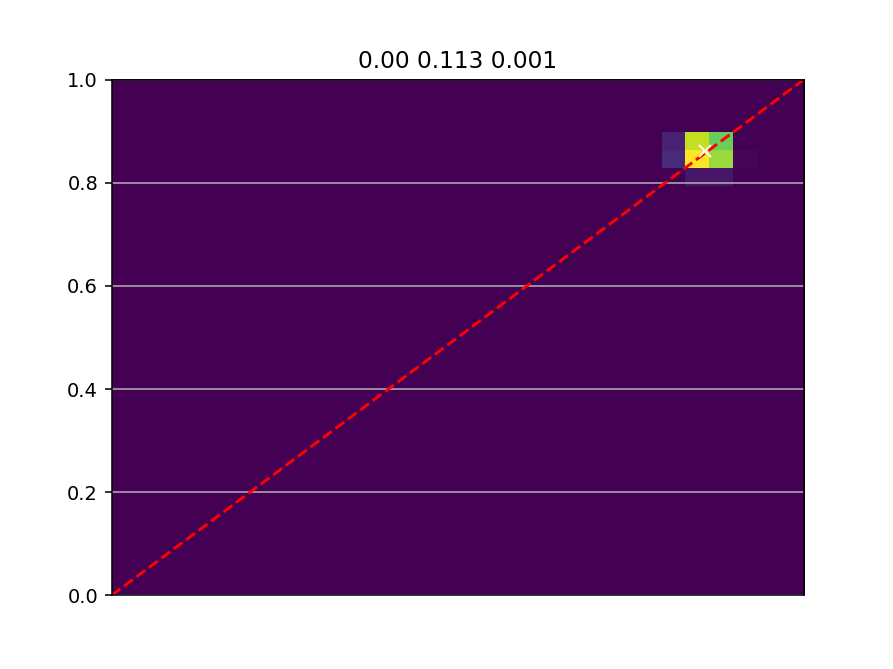

B02-ai3-cejy4aejktz5-cqr6ci7c/S02-ck3ceiqy4-aknqr5ekry6i
http://newflaw.com/view.php?rule_alias=b03aiknqr2cekn5aeijkny4aejktz7c6cis03ceiqy2aein5ekry4ceijtwyz6i


'http://newflaw.com/view.php?rule_alias=b03aiknqr2cekn5aeijkny4aejktz7c6cis03ceiqy2aein5ekry4ceijtwyz6i'

In [69]:
# %matplotlib inline
import repack
plt.figure()
i = (
    41135
# 37638
#     36168
#     28852
#     13330
#     35715
#     35888
    
)
# o = KBs.guess(dct=out[6777]['rule'])
o = KBs.guess(dct=out[i]['rule'])
kb = KBs.kb_r2dntca()
# rali = 'B2e3ejkr4ejqrtwz5cn6aikn7e/S01c2in3aejkr4ejkqtyz5ckq6-a'
# rali = 'b03ceiknr2acein5aeijknry4iknqtz7ce6aceikns03aj2a5aikqry4nyz7c6ac8'
# rali ='B2e3ejkr4ejkqrtwz5cn6aikn7e/S01c2in3aejkr4aejkqtyz5ckq6a'
# rali = 'B2e3ejkr4ejkqrtw5cn6-ce7e/S01c2in3ejkr4-cinrw5ckq6ak'
# rali = 'B2e3ejkr4ejkqrtw5cn6aikn7e/S01c2in3ejkr4aejkqtyz5ckq6ak'
# rali = 'B2e3ejkr4ejkqrw5cin6c7e/S01c2i3ejkry4-cinrw5ckq6ak'
# rali = 'B2e3ejkr4ejkqrw5cin6c7c/S01c2i3ejkry4aejkqtyz5ckq6ak'

# B2e3ejkr4ejkqrtwz5cn6rikn7e/S01c2in3aejkr4aejkqtyz5ckq6a;B2e3ejkr4ejkqrw5cin6c7e/S01c2i3ejkry4-cinrw5ckq6ak

# rstr = kb.alias2rulestr(rali)

# o  = KBs.CA_sys(familyname='2dntca',rulestr=rstr,dimsiz=(100,200,300))
o.rulestr2alias()
print repack.repack(o.alias)
workers.test0323(sysX=o)
# workers.test0323(sysX=o)
plt.show()
KBs.lview(o)

In [324]:
d = workers.worker0323(dct={'family':'2dntca','rulestr':o.rulestr})
d['grade']='fn'
data = np.load('data_pdist/reference.npy').tolist()
data.append(d)
np.save('data_pdist/reference.npy',data)


In [178]:
hist = KBs.sample(o)
plt.figure()
plt.imshow(hist[:,0].reshape((len(hist),-1)))


In [288]:
general = '''
1315
7820
7771
8956
12073

30185
17317
18275
23207
22457
23826
25095
27200
29999
30815
35715
33579
'''


# bottom left
bl='''
11602
11681
21713
'''

good='''
27200
30815
13330
35888
33579'''

amazing='''
8631
28852
28081
9240
'''
replicator = '''
8433
24502
'''
anti='''
28052
30668'''

In [306]:
def idx2df(idx,ref):
    if isinstance(idx,str):
        idx = [int(x) for x in idx.splitlines() if x]
    tp = [ref[x] for x in idx]
    map(lambda x:x.update({'grade':name}),tp)
    return tp
data =[]
for name in ['good','amazing','replicator','anti']:
    s = locals()[name]
    e = idx2df(s,out)
    data.extend(e)
np.save('%s/reference.npy'%DIR,data)

In [271]:
def lview(self,silent=0):
    fmt = 'http://newflaw.com/view.php?rule_alias={:}'
    uri = fmt.format(self.alias)
#     print uri
    ele = '<iframe src="{}" width=600 height=500></iframe>'.format(uri)
    if not silent:
        ipd.display(ipd.HTML(ele))
    return uri
KBs.lview = lview


In [283]:
for i in bl.splitlines():
    if not i:
        continue
    else:
        i = int(i)
        o = KBs.guess(dct=out[i]['rule'])
        print i
        print KBs.lview(o,silent=1)
#     break

11602
http://newflaw.com/view.php?rule_alias=b3ceijnr2ek5acejkqry4aejkrwz7c6aikns3eknqy2ai5acjknry4aijknq7ce6acn8
11681
http://newflaw.com/view.php?rule_alias=b1e3acjknqr2akn5aijknry4cejwyz6k8s3acejqry2ekn5acijknqr4cijnqwyz7ce6akn8
21713
http://newflaw.com/view.php?rule_alias=b3cinq2c5eijknqy4acitwz7e6acekns1c03acijknqr2ekn5kqry4aceijty7ce6i8


<IPython.core.display.Javascript object>


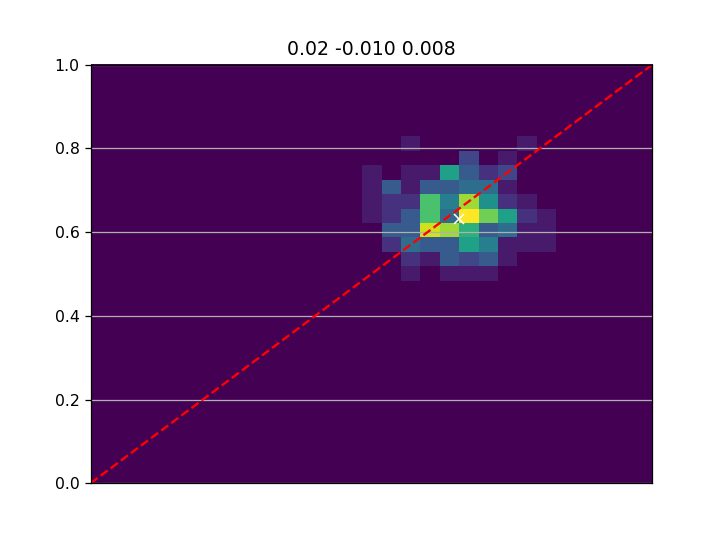

'http://newflaw.com/view.php?rule_alias=b1c3ai5acejkn4aijnqrwz7e6cen8s3ceijn2c5eijkq4aceikrt7c6aceikn8'

In [286]:
# %matplotlib inline
plt.figure()
i = (  
9845)
# for i in g.splitlines():
i = int(i)
# o = KBs.guess(dct=out[6777]['rule'])
o = KBs.guess(dct=out[i]['rule'])
workers.test0323(sysX=o)
plt.show()
KBs.lview(o)
#     raw_input('')

<IPython.core.display.Javascript object>


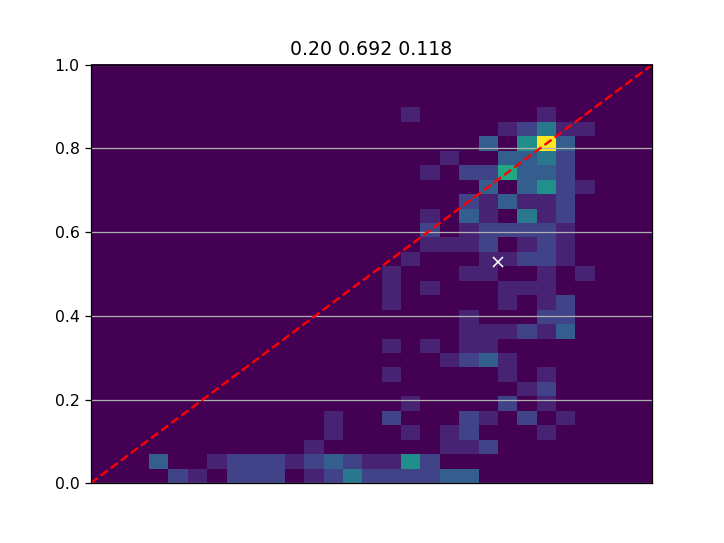

In [337]:
plt.figure()
o = KBs.guess(dct=tst_dct[3])
workers.test0323(sysX=o)
plt.show()

In [339]:
o.alias

'b1e03aeiknry2ceikn5acq4aejqrtwz7c6aekns1ce03aij2cei5ijkny4ajt6ik8'

In [338]:
KBs.lview(o)

'http://newflaw.com/view.php?rule_alias=b1e03aeiknry2ceikn5acq4aejqrtwz7c6aekns1ce03aij2cei5ijkny4ajt6ik8'